<a href="https://colab.research.google.com/github/EmanoellyLuciane/Analises_Exploratorias/blob/main/7_AnaliseExploratoria_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para análise de dados
Aqui, vamos mostrar como podemos utilizar o Python para uma tarefa, no meu ver a mais importante em projetos envolvendo análise de dados, a **Análise Exploratória de Dados**!

A `análise exploratória de dados` ou, em resumo, EDA (do inglês: *Exploratory Data Analysis*) é uma abordagem para analisar dados para resumir as principais características dos dados, obter uma melhor compreensão do conjunto de dados, descobrir relacionamentos entre diferentes variáveis ​​e extrair variáveis ​​importantes. EDA, é um passo importante em qualquer projeto de Análise de Dados ou Ciência de Dados.

O **principal objetivo** da EDA é detectar quaisquer erros ou discrepâncias, bem como entender diferentes padrões nos dados. Ele permite que os analistas entendam melhor os dados antes de fazer qualquer suposição e também descubram relacionamentos entre variáveis. Os resultados da EDA ajudam as empresas a conhecer seus clientes, expandir seus negócios e tomar melhores decisões.

## Concessionária de Veículos (Exemplo)
Nosso conjunto de dados de exemplo, se trata de Vendas de uma Concessionária de veículos usados.

Vamos entender melhor nosso conjunto de dados?

**Instalando e importando as bibliotecas necessárias**



In [ ]:
# instalando a xlrd
!pip install xlrd --upgrade

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importando o arquivo em Excel**

Importando para um dataframe (df)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/3. Estudos/Profissional/IA, ML/0. Scripts/Dados/carros_usados.xls')

**Visualizando as 5 primeiras linhas do Dataframe**

In [ ]:
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


**Visualizando as informações de colunas do Dataframe**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   data.set           7495 non-null   object
 1   total.cost         7495 non-null   int64 
 2   lot.sale.days      7495 non-null   int64 
 3   overage            7495 non-null   object
 4   mileage            7495 non-null   int64 
 5   vehicle.type       7495 non-null   object
 6   domestic.import    7495 non-null   object
 7   vehicle.age        7495 non-null   int64 
 8   vehicle.age.group  7495 non-null   object
 9   color.set          7495 non-null   object
 10  makex              7495 non-null   object
 11  state              7495 non-null   object
 12  make.model         7495 non-null   object
dtypes: int64(4), object(9)
memory usage: 761.3+ KB


**Descrição das Colunas**
- `data.set` - Dado de treino ou de test
- `total.cost` - Custo total do veiculo
- `lot.sale.days` - Tempo de venda em dias
- `overage` - Venda após 90 dias
- `mileage` - Kilometragem
- `vehicle.type` - Tipo do veículo (economy, family.medium, family.large...)
- `domestic.import` - Fabricação, domestico ou importado
- `vehicle.age` - Idade do veículo
- `vehicle.age.group` - Grupo de idade do veículo
- `color.set` - Cor
- `makex` - Marca
- `state` - Estado do Carro (região)
- `make.model` - Modelo

**Informações estatísticas das colunas Dataframe**
- contagens
- média
- valores máximo e mínimo
- desvio padrão
- quartis...

In [ ]:
df.describe()

,total.cost,lot.sale.days,mileage,vehicle.age
count,7495.000000,7495.000000,7495.000000,7495.000000
mean,4980.035490,76.454303,77234.533422,5.567312
std,937.602064,64.644337,17142.552588,1.756219
min,1375.000000,0.000000,1036.000000,1.000000
25%,4354.000000,14.000000,67946.000000,4.000000
50%,4919.000000,73.000000,78534.000000,5.000000
75%,5540.000000,120.000000,89340.000000,7.000000
max,9813.000000,300.000000,119250.000000,12.000000


**Consultando dados nulos ou Missing Values no Dataframe**

Neste caso não tem, isso em um arquivo do dia a dia é raro!

In [ ]:
df.isnull().sum()

data.set             0
total.cost           0
lot.sale.days        0
overage              0
mileage              0
vehicle.type         0
domestic.import      0
vehicle.age          0
vehicle.age.group    0
color.set            0
makex                0
state                0
make.model           0
dtype: int64

Agora que já temos uma ideia inicial do nosso conjunto de dados, vamos para a `Análise Exploratória de Dados` propriamente dita.

## Análise Exploratória de Dados




In [ ]:
# Importando bibliotecas que usaremos para visualizar as análises
import seaborn as sns
from matplotlib import pyplot as plt

**Define um estilo para nossos plots**

In [ ]:
plt.style.use('ggplot')

**Plota a distribuição da variável `total.cost`**

- Essa é a variável que contem o Custo Total do Veículo.

Text(0.5, 1.0, 'Distribuição da coluna total.cost')

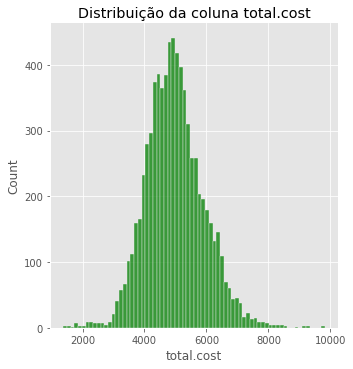

In [ ]:
%matplotlib inline
sns.displot(df['total.cost'],color='green', kde=False)
plt.title('Distribuição da coluna total.cost')

*Podemos observar que a maioria dos carros custam em torno de 4k e 6k.*

### Qual a quantidade média de dias que os carros ficam na concessionária?

Text(0.5, 1.0, 'Distribuição da coluna lot.sale.days')

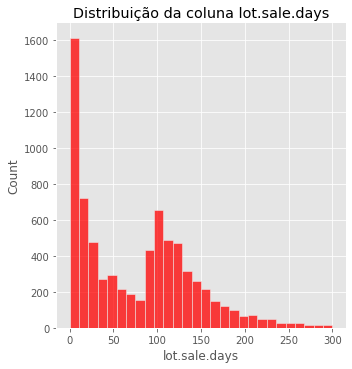

In [ ]:
%matplotlib inline
sns.displot(df['lot.sale.days'],color='red', kde=False)
plt.title('Distribuição da coluna lot.sale.days')

- *Podemos observar que os dias de vendas são inclinados para o lado esquerdo
 isso nos mostra que a maioria dos são vendidos nos primeiros 90 dias.*
- *Os restantes 20% são vendidos após 20 dias e são vendidos a preço de desconto.*

### Qual a Kilometragem média dos veículos da concessionária?

Text(0.5, 1.0, 'Distribuição da coluna mileage')

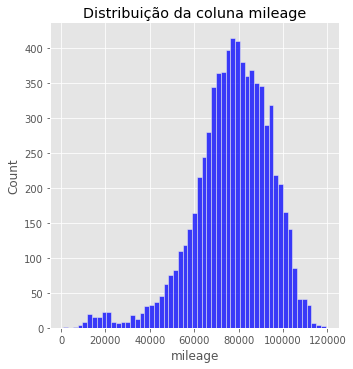

In [ ]:
# mileage - Kilometragem

%matplotlib inline
sns.displot(df['mileage'],color='blue', kde=False)
plt.title('Distribuição da coluna mileage')

- *Podemos observar que a grande maioria dos veículos estão na faixa de 60.000 a 90.000 de kilometragem*

### Qual a idade média dos veículos da concessionária?

Text(0.5, 1.0, 'Distribuição da coluna vehicle.age')

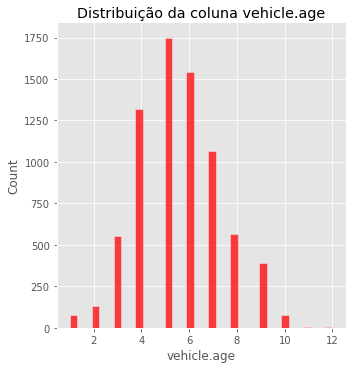

In [ ]:
%matplotlib inline
sns.displot(df['vehicle.age'],color='red', kde=False)
plt.title('Distribuição da coluna vehicle.age')

- *Podemos observar que a idade (`vehicle.age`) média dos veículos da concessionária são de 4 a 7 anos.*

### Visualizando a Correlação entre algumas variáveis

A Correlação de Pearson mede a dependência linear entre duas variáveis ​​X e Y.

O coeficiente resultante é um valor entre -1 e 1 inclusive, onde:

- 1 : Correlação linear positiva perfeita.
- 0 : Sem correlação linear, as duas variáveis ​​provavelmente não afetam uma à outra.
- -1 : Correlação linear negativa perfeita.
Correlação de Pearson é o método padrão da função “corr”.

Mostra:
- O quanto alguma variável numérica tem correlação com outra variável ?
- Correlação pode ser positiva ou negativa

In [ ]:
# Kilometragem | Idade | Dia para venda | Custo total
df[['mileage','vehicle.age','lot.sale.days','total.cost']].head()

,mileage,vehicle.age,lot.sale.days,total.cost
0,67341,8,135,4037
1,72823,6,114,6886
2,96330,9,205,3924
3,58519,4,100,4636
4,99057,4,129,5080


- Calcula a correlação com método corr()

In [ ]:
# Kilometragem | Idade | Dia para venda | Custo total
df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

,mileage,vehicle.age,lot.sale.days,total.cost
mileage,1.000000,0.462838,0.060003,-0.127258
vehicle.age,0.462838,1.000000,0.186480,-0.309716
lot.sale.days,0.060003,0.186480,1.000000,0.167632
total.cost,-0.127258,-0.309716,0.167632,1.000000


- Plot o `mapa de calor` para visualizar as `correlações`

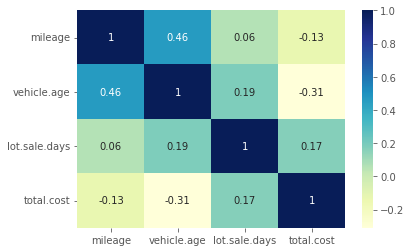

In [ ]:
correlacoes = df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

%matplotlib inline
sns.heatmap(correlacoes, annot=True, cmap="YlGnBu")

- *O gráfico de calor acima nos mostra que não existe uma correlação forte das variáveis com a quantidade de dias de vendas(lot.sale.days)*
- *Podemos ver que a kilometragem (Mileage) tem uma correlação positiva com a idade do veículo (vehicle.age).*
- *Podemos ver também que os dias de vendas (lot.sale.days) tem uma correlação positiva com o custo total do veículo (total.cost) e com a idade do veículo (vehicle.age)*

### Quantas modelos de veiculos temos na nossa base e a quantidade de cada um deles?

In [ ]:
df['make.model'].value_counts().to_frame()

,make.model
NISSAN.SENTRA,441
CHEVROLET.LUMINA,431
FORD.TAURUS,357
BUICK.LESABRE,271
PONTIAC.GRAND AM,269
...,...
CHRYSLER.FIFTH AVENUE,1
SUBARU.IMPREZA,1
SUBARU.LOYALE,1
INFINITI.I30,1


Quantas marcas e quais são as marcas de veículos?

In [ ]:
df['makex'].unique()

array(['BUICK', 'DODGE', 'OLDSMOBILE', 'KIA', 'CHEVROLET', 'MITSUBISHI',
       'FORD', 'MERCURY', 'PONTIAC', 'DAEWOO', 'NISSAN', 'GEO',
       'CHRYSLER', 'MAZDA', 'PLYMOUTH', 'TOYOTA', 'HONDA', 'HYUNDAI',
       'OTHER', 'CADILLAC'], dtype=object)

### Quais os veículos com Idade maior que 11 anos?

In [ ]:
df[df['vehicle.age'] > 11]

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
50,TRAIN,3767,233,YES,87086,FAMILY.MEDIUM,Domestic,12,SEVEN+,BLUE,OLDSMOBILE,VA,OLDSMOBILE.CIERA
209,TRAIN,2954,101,YES,115427,FAMILY.SMALL,Import,12,SEVEN+,GOLD,MAZDA,VA,MAZDA.626
2710,VALIDATE,2530,143,YES,108709,ECONOMY,Domestic,12,SEVEN+,WHITE,CHEVROLET,VA,CHEVROLET.CORSICA


### Visualizando a dispersão entre os dias de vendas (lot.sale.days) e algumas variáveis

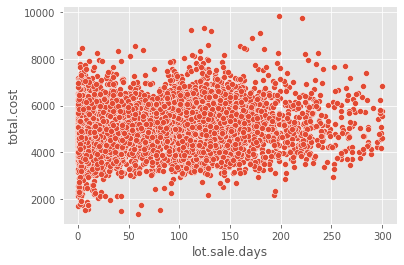

In [ ]:
# lot.sale.days com total.cost

%matplotlib inline
sns.scatterplot(x='lot.sale.days', y="total.cost", data=df)

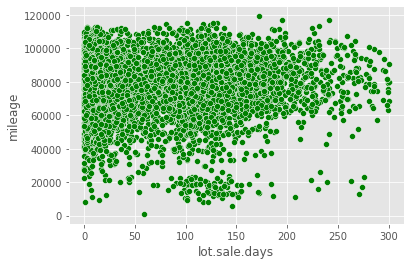

In [ ]:
# lot.sale.days com mileage

%matplotlib inline
sns.scatterplot(x='lot.sale.days', y="mileage", color='green', data=df)

### Tempo médio de vendas por tipos de Veiculos (domestic.import)

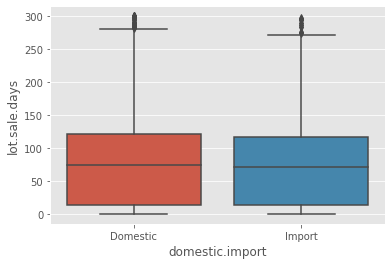

In [ ]:
%matplotlib inline
sns.boxplot(x="domestic.import", y="lot.sale.days", data=df)

### Tempo médio de vendas por categoria de Veiculos

`lot.sale.days` por `vehicle.type`

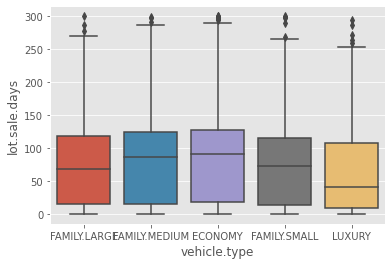

In [ ]:
%matplotlib inline
sns.boxplot(x="vehicle.type", y="lot.sale.days", data=df)

- *Não existem diferenças significativas entre veículos domesticos e veículos importados em termos de quão rápido eles são vendidos.*
- *Veiculos econômicos demoram um pouco mais para serem vendidos se comparado veículos de família, de luxo ou sedans.*
- *Em média, leva 90 dias para vender veículos econômicos,  84 dias para vender veículos de família e 40 dias para vender veículos de luxo.*

### Tempo médio de vendas por cor de Veiculos

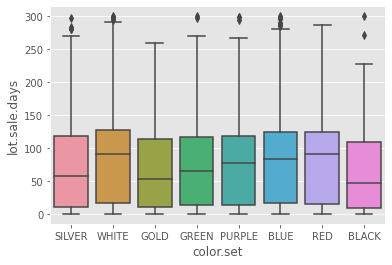

In [ ]:
%matplotlib inline
sns.boxplot(x="color.set", y="lot.sale.days", data=df)

- *Podemos observar que nesse gráfico que em média os carros que saem mais rápido são carros pretos.*
- *Em segundo lugar são carros dourados com 53 dias. Por fim os carros que demoram mais para serem vendidos são carros brancos com 90 dias*

### Tempo médio de vendas (lot.sale.days) por marca dos Veiculos (makex)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

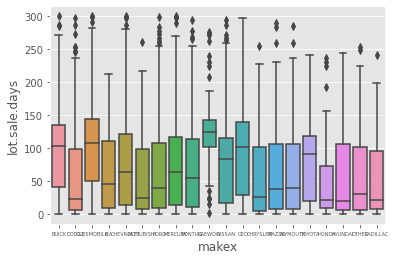

In [ ]:
%matplotlib inline
sns.boxplot(x="makex", y="lot.sale.days", data=df)
plt.xticks(size=5)

- *Marcas tem uma grande diferença no tempo de vendas dos veículos.*
- *Algumas marcas de veículos quem vendem rápido tendem a ser Honda, Chrysler, Dodge, Hyundai, Plymouth.*
- *As marcas Daewoo, Oldsmobile, Buick e GEO permanecem por mais tempo antes de serem vendidos.*

### Tempo médio de vendas por estado

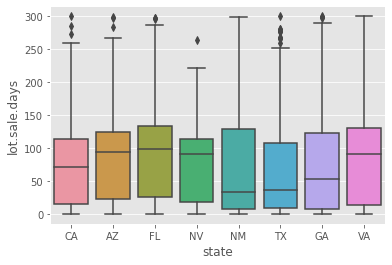

In [ ]:
%matplotlib inline
sns.boxplot(x="state", y="lot.sale.days", data=df)

- *Alguns estados como California, Georgia e Texas tem diferença significante de dias para serem vendidos se comparado com Florida, Arizona e Nevada.*


## Construindo um Modelo de Machine Learning

Agora que já demos uma olhada nos nossos dados, entendemos algumas correlações e etc, vamos fazer um modelo de *Machine Learning*? Vamos lá...

In [ ]:
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


**Pre-processando os dados**

- Precisamos pré-processar algumas colunas, pois, são colunas categóricas.
- Nesta etapa também removemos colunas não importantes para o modelo.

Removendo as colunas `vehicle.age.group` e `data.set` - não importantes para o modelo

In [ ]:
df.drop('vehicle.age.group', axis=1, inplace=True)

In [ ]:
df.drop('data.set', axis=1, inplace=True)

**Aplicando o LabelEncoder para codificação de variáveis categóricas**

"Descategorizando" variáveis categóricas (transformando variáveis categóricas em numéricas)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder6 = LabelEncoder()

**Aplica o Labelencoder nos dados categóricos**

In [ ]:
df['vehicle.type'] = label_encoder1.fit_transform(df['vehicle.type'])
df['domestic.import'] = label_encoder2.fit_transform(df['domestic.import'])
df['color.set'] = label_encoder3.fit_transform(df['color.set'])
df['makex'] = label_encoder4.fit_transform(df['makex'])
df['state'] = label_encoder5.fit_transform(df['state'])
df['make.model'] = label_encoder6.fit_transform(df['make.model'])

**Dados transformados**

In [ ]:
# Visualizando os 5 primeiros registros
df.head()

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,135,YES,67341,1,0,8,6,0,1,1
1,6886,114,YES,72823,2,0,6,7,5,0,33
2,3924,205,YES,96330,2,0,9,7,15,2,77
3,4636,100,YES,58519,0,1,4,2,10,5,54
4,5080,129,YES,99057,2,0,4,3,15,5,77


**Separa a classe dos dados**

A classe (target - y) aqui para nosso modelo será a variável: `overage`, que é a variável que mostra que o veículo foi vencido em menos de 90 dias ou não.

In [ ]:
y = df['overage']

In [ ]:
y.head()

0    YES
1    YES
2    YES
3    YES
4    YES
Name: overage, dtype: object

**Apaga a coluna overage e a coluna lot.days.sales**

Para X, apagamos os atributos: `overage` e `lot.days.sales` (essa última, para evitar viés)

In [ ]:
X = df.drop(['lot.sale.days','overage'], axis=1)

In [ ]:
X.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,67341,1,0,8,6,0,1,1
1,6886,72823,2,0,6,7,5,0,33
2,3924,96330,2,0,9,7,15,2,77
3,4636,58519,0,1,4,2,10,5,54
4,5080,99057,2,0,4,3,15,5,77


**Separando os dados de treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

Visualizando os dados de treino e teste

In [ ]:
X_treino.count()

total.cost         5621
mileage            5621
vehicle.type       5621
domestic.import    5621
vehicle.age        5621
color.set          5621
makex              5621
state              5621
make.model         5621
dtype: int64

In [ ]:
y_treino.count()

5621

In [ ]:
X_treino.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
6319,4306,42204,0,1,3,7,10,6,54
2914,4816,89106,2,0,8,1,0,2,4
5533,5466,81563,1,0,6,7,15,0,77
5137,4522,93521,3,1,6,1,19,1,93
6070,3416,84883,3,1,8,3,7,1,44


In [ ]:
y_treino.head()

6319     NO
2914    YES
5533     NO
5137     NO
6070     NO
Name: overage, dtype: object

In [ ]:
X_teste.count()

total.cost         1874
mileage            1874
vehicle.type       1874
domestic.import    1874
vehicle.age        1874
color.set          1874
makex              1874
state              1874
make.model         1874
dtype: int64

In [ ]:
y_teste.count()

1874

In [ ]:
X_teste.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
4173,3535,92987,3,1,9,3,19,1,93
4527,5232,48180,0,0,3,7,6,3,39
2780,5460,81175,3,0,5,3,18,1,83
6900,3956,80543,3,0,4,5,2,1,14
7283,5043,63101,2,0,4,3,6,6,41


**Aplicando Machine Learning com Arvore de Decisão**

Uma árvore de decisão é um algoritmo de aprendizado de máquina supervisionado que é utilizado para classificação e para regressão. Isto é, pode ser usado para prever categorias discretas (sim ou não, por exemplo) e para prever valores numéricos (o valor do lucro em reais). [Mais...] https://blogdozouza.wordpress.com/2019/09/30/decision-trees-e-random-forests-para-classificacao-e-regressao/)

In [ ]:
# importando
from sklearn import tree

In [ ]:
# instanciando
arvore = tree.DecisionTreeClassifier()

In [ ]:
# treinando
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier()

**Validação do Modelo**

In [ ]:
# visualizando os dados de teste
X_teste.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
4173,3535,92987,3,1,9,3,19,1,93
4527,5232,48180,0,0,3,7,6,3,39
2780,5460,81175,3,0,5,3,18,1,83
6900,3956,80543,3,0,4,5,2,1,14
7283,5043,63101,2,0,4,3,6,6,41


In [ ]:
# predizendo os dados de teste
arvore.predict(X_teste)

array(['YES', 'NO', 'YES', ..., 'NO', 'YES', 'YES'], dtype=object)

In [ ]:
resultado = arvore.predict(X_teste)

In [ ]:
resultado

array(['YES', 'NO', 'YES', ..., 'NO', 'YES', 'YES'], dtype=object)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_teste,resultado))

              precision    recall  f1-score   support

          NO       0.65      0.65      0.65      1005
         YES       0.60      0.61      0.60       869

    accuracy                           0.63      1874
   macro avg       0.63      0.63      0.63      1874
weighted avg       0.63      0.63      0.63      1874



**`Conclusões`:**

- Tivemos uma precisão de 62% para classificar carros que superam os 90 dias.
- O modelo pode melhorar se trabalhar mais nos dados, e com um trabalho de engenharia de features.

**Features mais importantes para o modelo**

Descobrindo as variáveis mais importantes para o modelo usando arvore de decisão...

In [ ]:
arvore.feature_importances_

array([0.27782561, 0.22723879, 0.0835638 , 0.01077992, 0.07366022,
       0.07987865, 0.03594917, 0.07933382, 0.13177002])

In [ ]:
feature_imp = pd.Series(arvore.feature_importances_,index=X_treino.columns)

In [ ]:
feature_imp

total.cost         0.277826
mileage            0.227239
vehicle.type       0.083564
domestic.import    0.010780
vehicle.age        0.073660
color.set          0.079879
makex              0.035949
state              0.079334
make.model         0.131770
dtype: float64

**Visualizando as Features mais importantes do Modelo**

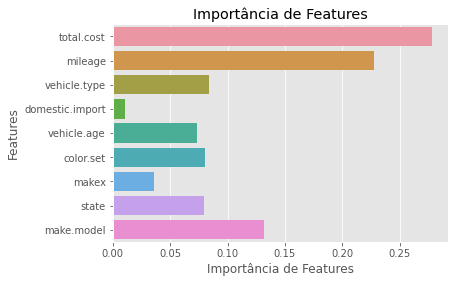

In [ ]:
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Importância de Features')
plt.ylabel('Features')
plt.title("Importância de Features")
plt.show()

### Visualizando a árvore de Decisão

- Instala as bibliotecas para visualização no notebook

In [ ]:
!pip install pydot
!pip install graphviz

In [ ]:
import pydot
import graphviz
from ipywidgets import interactive

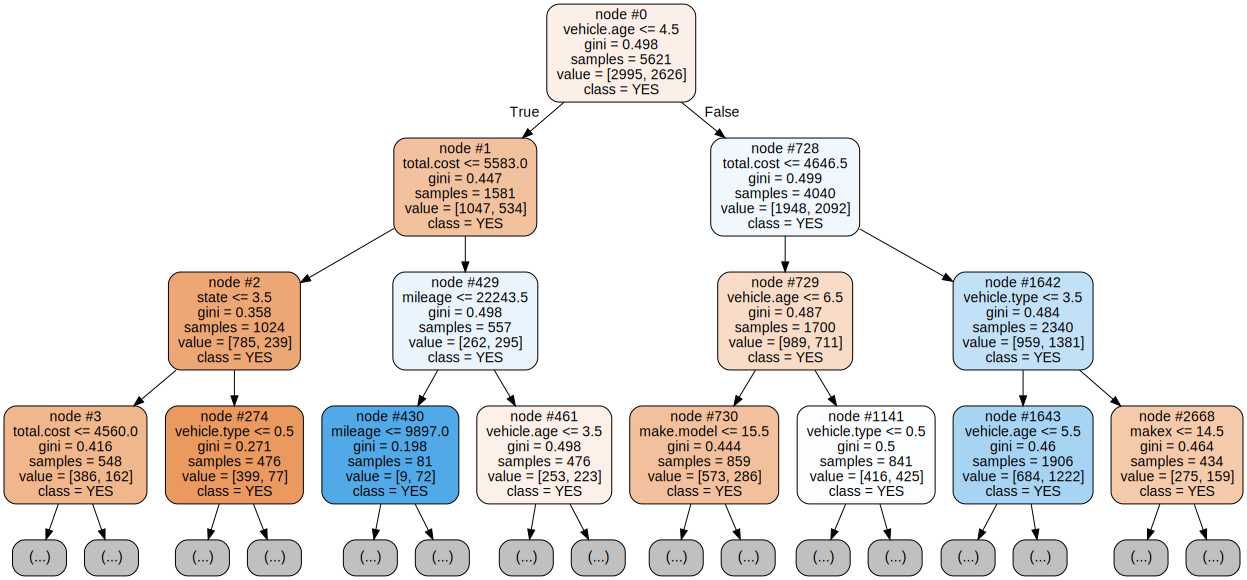

In [ ]:
dot_data = tree.export_graphviz(
         arvore,
         feature_names=X.columns,
         class_names=y,
         max_depth=3,
         filled=True,
         rounded=True,
         node_ids=True,
         label='all',
        )
graph = graphviz.Source(dot_data)
graph

- *O nó que melhor separa os dados é o nó vehicle.age, em seguida o nó total.cost e mileage.*